In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

# Section 1

## Q1. What is IEX?

It's a stock exchagne in the US. It was founded in 2012 by Brad Katsuyama and Ronan Ryan to mitigate the effects of high-frequency trading. IEX delays the flow of data from the exchagne and ensures that it arrives simultaneously at two points of presence in New Jersy. Traders are not allowed to co-located equipment adjacent to IEX's own servers, unlike many other trading platforms.

## Q2. What stocks trade on IEX?

In [2]:
def parse_to_dataframe(text_file_path):
    with open(text_file_path, "r") as file:
        columns = file.readline().strip().split("|")
        df = pd.read_csv(file, sep="|", header=None, names=columns)
    return df

text_file_path = "nasdaqtraded.txt"
nasdaq = parse_to_dataframe(text_file_path)
nasdaq.head()

FileNotFoundError: [Errno 2] No such file or directory: 'nasdaqtraded.txt'

## Q3. Describe each column in 1 line

In [ ]:
nasdaq.columns

Index(['Nasdaq Traded', 'Symbol', 'Security Name', 'Listing Exchange',
       'Market Category', 'ETF', 'Round Lot Size', 'Test Issue',
       'Financial Status', 'CQS Symbol', 'NASDAQ Symbol', 'NextShares'],
      dtype='object')

## Q4. How many stocks are traded in the US?

In [ ]:
f'There are {nasdaq["Security Name"].notna().sum()} stocks traded in the US.'

'There are 11288 stocks traded in the US.'

## Q5. What are all the listing exchanges?

In [ ]:
nasdaq["Listing Exchange"].nunique()

6

## Q6. What are market hours?

From 9:30 am to 4 pm

## Q7. What are the different sectors?

Commercial Services, Communications, Consumer Durables, Consumer Non-Durables, Consumer Services, Distribution Services, Electornic Technology, Energy Minerals, Finance, Health Services, Health Tech, Industrial Services, Miscellaneous, Non-Energy Minerals, Process Industries, Producer Manufacturing, Retail Trade, Technology Services, Transportation, Utilities.

## Q8. Which sectors have the highest and lowest market capitalization?

- Technology Services has the highest highest market cap, 11.655T.
- Distribution Services has the lowest market cap, 538.192B.

## Q9. List the top becnhmark indices? Describe in 1 line how they are calculated.

- Dow Jones Industiral: this is a price-weighted index. The companies with higher stock prices have a greater impact on this index performance.
- S&P 500: this is a market cap-weighted index. Market cap is calculated by multipliying the stock's price by the total number of shares outstanding.
- Nasdaq Composite: Nasdaq is also a market cap-weighted index.

## Q10. What is a ticker?

Ticker is a unique name for security served as an abbreviation. For contract, an extra character and number will be added at the end of the ticker to indicate the year and month.

## Q11. What is a Limit Order Book (LOB)?

A limit order book is an electronic record of all limit buy and sell orders for a particular ticker. It has metrics like layer, size, price and so on.

# Section 2

You need to run the iexparser to generate these CSV files.

In [ ]:
try:
    bookupdates = pd.read_csv('/Users/harshagarwal/Desktop/fall23/fin556/group_05_project/Sample-Data/book_snapshots_iex/20211105_book_updates.csv')
    trades = pd.read_csv('/Users/harshagarwal/Desktop/fall23/fin556/group_05_project/Sample-Data/book_snapshots_iex/20211105_trades.csv')
except Exception as e:
    print("Error:", e)

In [ ]:
bookupdates.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  BID_PRICE_1  \
0  2021-11-05 12:01:35.689777920       48199   ASK_UPDATE    PFE        49.03   
1  2021-11-05 12:04:06.719709952       49995   ASK_UPDATE    PFE        48.91   
2  2021-11-05 12:04:44.626915072       50353   ASK_UPDATE    PFE        49.01   
3  2021-11-05 12:04:44.635420928       50354   BID_UPDATE    PFE        48.99   
4  2021-11-05 12:04:44.646903040       50355   BID_UPDATE    PFE        49.01   

   BID_SIZE_1  BID_PRICE_2  BID_SIZE_2  BID_PRICE_3  BID_SIZE_3  ASK_PRICE_1  \
0         100        49.01         100        48.99         100        49.05   
1         100        48.89         100        48.87         100        48.95   
2         100        48.99         100        48.97         100        49.03   
3         100        48.97         100        48.95         100        49.03   
4         100        48.99         100        48.97         100        49.03   

   ASK_SIZE_1  ASK_PRICE_2  ASK_SIZE_2  ASK_PRICE_3  ASK_SIZE_3  
0         100        49.07          70        49.09         100  
1         100        48.97          80        48.99         100  
2         100        49.05         100        49.07         100  
3         100        49.05         100        49.07         100  
4         100        49.05         100        49.07         100

In [ ]:
trades.head()

COLLECTION_TIME  MESSAGE_ID MESSAGE_TYPE SYMBOL  PRICE  SIZE  \
0  2021-11-05 12:00:01.014268928       45993            T    PFE  48.79    30   
1  2021-11-05 12:00:02.876574976       46343            T    PFE  48.81   100   
2  2021-11-05 12:00:02.876641024       46344            T    PFE  48.81   100   
3  2021-11-05 12:00:02.876700928       46345            T    PFE  48.81   100   
4  2021-11-05 12:00:06.131293952       46385            T    MRK  82.67    50   

   TRADE_ID             TRADE_FLAGS  
0   2317665  EXTENDED_HOURS|ODD_LOT  
1   2382801          EXTENDED_HOURS  
2   2382807          EXTENDED_HOURS  
3   2382812          EXTENDED_HOURS  
4   2421377  EXTENDED_HOURS|ODD_LOT

## Q12. What does MESSAGE_TYPE indicate?

MESSAGE_TYPE inficates the type of the current row in the book snapshot. For the bookupdates csv file, MESSAGE_TYPE indicates if the book order is updating the ask or bid levels. In the trades csv file, MESSAGE_TYPE indicates that a trade happened (T), this is because this file only contains trades that cleared the market and therfore would update the order book.

## Q13. How deep is our data?

Our bookupdate data is three levels deep (3 levels on the bid side and 3 levels on the ask side).

## Q14. Classify the stocks into their respective sectors.
(The bookupdates are just for a subset of stocks so don't worry)

In [ ]:
stocks = ["SPY","IVV","VOO","VXX","QQQ","TLT","LQD","HYG","USO","SPXL","DDG","FINZ","OILD","PSQ","PST","SDS","MSFT","AAPL","AMZN","FB","GOOGL","GOOG","DIA","BA","UNH","AAPL","GS",
          "HD","MCD","V","MMM","UTX","DIS","CAT","JNJ","TRV","JPM","IBM","PG","AXP","WMT","CVX","NKE","MRK","XOM","VZ","WBA","INTC","KO","DOW","CSCO","PFE","SH","TCEHY","NPSNY","DELL",
          "VMW","CYB","BRK.A","BRK.B","AAPL","BAC","KO","AXP","KHC","MCO","USB","DVA","WFC","GM","CHTR","BK","VRSN","ABBV","SNOW","V","BMY","MRK","LSXMK","AMZN","MA","STNE"]

sectors = ["Commercial Services", "Communications", "Consumer Durables", "Consumer Non-Durables", "Consumer Services", "Distribution Services",
           "Electornic Technology", "Energy Minerals", "Finance", "Health Services", "Health Tech", "Industrial Services", "Miscellaneous", "Non-Energy Minerals",
           "Process Industries", "Producer Manufacturing", "Retail Trade", "Technology Services", "Transportation, Utilities"]

stock_sectors = [
    ("SPY", "Finance"),
    ("IVV", "Finance"),
    ("VOO", "Finance"),
    ("VXX", "Finance"),
    ("QQQ", "Technology Services"),
    ("TLT", "Finance"),
    ("LQD", "Finance"),
    ("HYG", "Finance"),
    ("USO", "Energy Minerals"),
    ("SPXL", "Finance"),
    ("DDG", "Finance"),
    ("FINZ", "Finance"),
    ("OILD", "Energy Minerals"),
    ("PSQ", "Finance"),
    ("PST", "Finance"),
    ("SDS", "Finance"),
    ("MSFT", "Technology Services"),
    ("AAPL", "Technology Services"),
    ("AMZN", "Technology Services"),
    ("FB", "Technology Services"),
    ("GOOGL", "Technology Services"),
    ("GOOG", "Technology Services"),
    ("DIA", "Finance"),
    ("BA", "Industrial Services"),
    ("UNH", "Health Services"),
    ("AAPL", "Technology Services"),
    ("GS", "Finance"),
    ("HD", "Consumer Durables"),
    ("MCD", "Consumer Services"),
    ("V", "Finance"),
    ("MMM", "Industrial Services"),
    ("UTX", "Industrial Services"),
    ("DIS", "Consumer Services"),
    ("CAT", "Industrial Services"),
    ("JNJ", "Health Services"),
    ("TRV", "Finance"),
    ("JPM", "Finance"),
    ("IBM", "Technology Services"),
    ("PG", "Consumer Non-Durables"),
    ("AXP", "Finance"),
    ("WMT", "Retail Trade"),
    ("CVX", "Energy Minerals"),
    ("NKE", "Consumer Durables"),
    ("MRK", "Health Services"),
    ("XOM", "Energy Minerals"),
    ("VZ", "Communications"),
    ("WBA", "Retail Trade"),
    ("INTC", "Technology Services"),
    ("KO", "Consumer Non-Durables"),
    ("DOW", "Process Industries"),
    ("CSCO", "Technology Services"),
    ("PFE", "Health Services"),
    ("SH", "Finance"),
    ("TCEHY", "Technology Services"),
    ("NPSNY", "Health Services"),
    ("DELL", "Technology Services"),
    ("VMW", "Technology Services"),
    ("CYB", "Finance"),
    ("BRK.A", "Finance"),
    ("BRK.B", "Finance"),
    ("AAPL", "Technology Services"),
    ("BAC", "Finance"),
    ("KO", "Consumer Non-Durables"),
    ("AXP", "Finance"),
    ("KHC", "Consumer Non-Durables"),
    ("MCO", "Finance"),
    ("USB", "Finance"),
    ("DVA", "Health Services"),
    ("WFC", "Finance"),
    ("GM", "Consumer Durables"),
    ("CHTR", "Technology Services"),
    ("BK", "Finance"),
    ("VRSN", "Technology Services"),
    ("ABBV", "Health Services"),
    ("SNOW", "Technology Services"),
    ("V", "Finance"),
    ("BMY", "Health Services"),
    ("MRK", "Health Services"),
    ("LSXMK", "Technology Services"),
    ("AMZN", "Technology Services"),
    ("MA", "Finance"),
    ("STNE", "Technology Services")
]

stocks_per_sector = {}
for cur_stock, cur_sector in stock_sectors:
    if cur_sector in stocks_per_sector:
        stocks_per_sector[cur_sector].append(cur_stock)
    else:
        stocks_per_sector[cur_sector] = [cur_stock]

for cur_sector, cur_stocks in stocks_per_sector.items():
    print(f"Sector: {cur_sector} | Stocks: {', '.join(cur_stocks)}")

Sector: Finance | Stocks: SPY, IVV, VOO, VXX, TLT, LQD, HYG, SPXL, DDG, FINZ, PSQ, PST, SDS, DIA, GS, V, TRV, JPM, AXP, SH, CYB, BRK.A, BRK.B, BAC, AXP, MCO, USB, WFC, BK, V, MA
Sector: Technology Services | Stocks: QQQ, MSFT, AAPL, AMZN, FB, GOOGL, GOOG, AAPL, IBM, INTC, CSCO, TCEHY, DELL, VMW, AAPL, CHTR, VRSN, SNOW, LSXMK, AMZN, STNE
Sector: Energy Minerals | Stocks: USO, OILD, CVX, XOM
Sector: Industrial Services | Stocks: BA, MMM, UTX, CAT
Sector: Health Services | Stocks: UNH, JNJ, MRK, PFE, NPSNY, DVA, ABBV, BMY, MRK
Sector: Consumer Durables | Stocks: HD, NKE, GM
Sector: Consumer Services | Stocks: MCD, DIS
Sector: Consumer Non-Durables | Stocks: PG, KO, KO, KHC
Sector: Retail Trade | Stocks: WMT, WBA
Sector: Communications | Stocks: VZ
Sector: Process Industries | Stocks: DOW


## Q15. What does sectoral rotation mean?

Sectoral rotation is a type of investment strategy where an investor moves money around between different sectors in the market based on the current and future economic cycles. The main idea behind this idea is that different sectors/industires perform worse or better during certain cycles, and investors try to maximize their PnL by using these cycles to their advantage. This type of strategy also stems from the ability try and predict the start and duration of economic sectors and anticipate the market's movement as it reacts to the current economy.

## Q16. What is the precision of the timestamp?

In [ ]:
print(bookupdates['COLLECTION_TIME'][0])
print(trades['COLLECTION_TIME'][0])
print("The time stamps are precise up to the nanosecond.")

2021-11-05 12:01:35.689777920
2021-11-05 12:00:01.014268928
The time stamps are precise up to the nanosecond.


## Q17. Which sector has the most active orderbook?
## Q18. Which stock has the most active orderbook?

In [ ]:
# Calculate the number of times each stock occurs in 'bookupdates'
bookupdates_stock_counts = bookupdates['SYMBOL'].value_counts().reset_index()
bookupdates_stock_counts.columns = ['SYMBOL', 'BookUpdates_Count']

# Calculate the number of times each stock occurs in 'trades'
trades_stock_counts = trades['SYMBOL'].value_counts().reset_index()
trades_stock_counts.columns = ['SYMBOL', 'Trades_Count']

# Merge the stock counts from book updates and trades and find the sum
merged_counts = bookupdates_stock_counts.merge(trades_stock_counts, on='SYMBOL', how='outer').fillna(0)
merged_counts['BookUpdates_Count'] = merged_counts['BookUpdates_Count'].astype(int)
merged_counts['Trades_Count'] = merged_counts['Trades_Count'].astype(int)
merged_counts['Total_Count'] = merged_counts['BookUpdates_Count'] + merged_counts['Trades_Count']

# Find the most active sector
sector_counts = {}
for cur_sector, cur_stocks in stocks_per_sector.items():
    sector_data = merged_counts[merged_counts['SYMBOL'].isin(cur_stocks)]
    sector_counts[cur_sector] = sector_data['BookUpdates_Count'].sum()
most_active_sector = max(sector_counts, key=sector_counts.get)

# Find the most active stock
most_active_stock = merged_counts.loc[merged_counts['BookUpdates_Count'].idxmax()]['SYMBOL']

print(f"The sector with the most active order book is: {most_active_sector}")
print(f"The stock with the most active order book is: {most_active_stock}")

The sector with the most active order book is: Finance
The stock with the most active order book is: SPY


## Q19. List and describe all the unique trade flags

In [ ]:
trade_flags = ["INTERMARKET_SWEEP", "EXTENDED_HOURS", "ODD_LOT", "TRADE_THROUGH_EXEMPT", "SINGLE_PRICE_CROSS", "REGULAR_HOURS"]

- INTERMARKET_SWEEP: Intermarket Sweep Flag -> trade resulted from an ISO
- EXTENDED_HOURS: Extended Hours Flag -> Trade occurred before or after the Regular Market Session
- ODD_LOT: Odd Lot Flag -> Trade is less than one round lot
- TRADE_THROUGH_EXEMPT: Trade Though Exempt Flag -> Trade is not subject to Trade Through Rull 611 of SEC Reg. NMS (when the taking order was an ISO that traded through a protected quotation, OR the NBBO was crossed at the time of the trade, OR the trade occurred through a self-helped venue's quotation, OR the trade was a single-price cross)
- SINGLE_PRICE_CROSS: Single-price Cross Trade Flag -> Trade resulted from a single-price cross
- REGULAR_HOURS: Regular Hours Flag -> Trade occurred during Regular Market Session

<br>
Link: https://assets-global.website-files.com/635ad1b3d188c10deb1ebcba/63bd4a1cb0d2bef3cbf36bcc_IEX%20DEEP%20Specification%20v1.08.pdf

## Q20. Find total trades for each ticker & sort them in descending order

In [ ]:
# Sort the results in descending order by the total number of trades (trades_stock_counts from previous cell)
sorted_trades_count = trades_stock_counts.sort_values(by='Trades_Count', ascending=False)

# Display settings to print more
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

print("Total trades for each ticker (sorted in descending order):")
print(sorted_trades_count)

Total trades for each ticker (sorted in descending order):
   SYMBOL  Trades_Count
0     PFE         24013
1      FB         10978
2    MSFT         10165
3     SPY          9807
4     MRK          9041
5       V          7979
6      MA          7168
7    INTC          6992
8    AAPL          6568
9     JPM          6066
10   AMZN          5341
11     VZ          5070
12     KO          4948
13    BAC          4710
14    HYG          4463
15     BA          4272
16   CSCO          4032
17    DIS          4002
18     GM          3857
19    XOM          3851
20  GOOGL          3762
21    WFC          3692
22    JNJ          3604
23    VXX          3574
24    QQQ          3339
25  BRK.B          3329
26    TLT          3179
27   DELL          3022
28    USB          2570
29    CVX          2556
30    NKE          2456
31    MCD          2426
32    DOW          2412
33    AXP          2358
34    IBM          2298
35     HD          2295
36     PG          2248
37   ABBV          2228
38   

## Q21. Categorize these trades using tickers and trade flags.
(Tip: 1 Hot Encoding)

In [14]:
# Initialize an empty dictionary to store results
symbol_flags_counts_dict = {}

# Initialize a dictionary to store the total counts of each trade flag
total_flags_counts = {flag: 0 for flag in trade_flags}

# Loop through unique symbols in the 'SYMBOL' column
for cur_symbol in trades['SYMBOL'].unique():
    # Filter trades for the current symbol
    symbol_trades = trades[trades['SYMBOL'] == cur_symbol]
    
    # Create a dictionary to store the counts of each trade flag for the current symbol
    trade_flags_counts = {}
    
    # Iterate through each trade flag and count its occurrences for the current symbol
    for cur_flag in trade_flags:
        cur_count = symbol_trades['TRADE_FLAGS'].str.contains(cur_flag).sum()
        trade_flags_counts[cur_flag] = cur_count
        total_flags_counts[cur_flag] += cur_count
    
    # Store the trade flags counts for the current symbol in the main dictionary
    symbol_flags_counts_dict[cur_symbol] = trade_flags_counts

# Print the resulting dictionary
print("Trade Flags for Each Symbol:")
for cur_symbol in symbol_flags_counts_dict:
    print(f"{cur_symbol}: {symbol_flags_counts_dict[cur_symbol]}")
print("\nTotal Trade Flags:")
print(total_flags_counts)


Trade Flags for Each Symbol:
PFE: {'INTERMARKET_SWEEP': 7668, 'EXTENDED_HOURS': 1289, 'ODD_LOT': 6871, 'TRADE_THROUGH_EXEMPT': 722, 'SINGLE_PRICE_CROSS': 0, 'REGULAR_HOURS': 22724}
MRK: {'INTERMARKET_SWEEP': 3156, 'EXTENDED_HOURS': 485, 'ODD_LOT': 3855, 'TRADE_THROUGH_EXEMPT': 68, 'SINGLE_PRICE_CROSS': 0, 'REGULAR_HOURS': 8556}
SNOW: {'INTERMARKET_SWEEP': 729, 'EXTENDED_HOURS': 8, 'ODD_LOT': 1036, 'TRADE_THROUGH_EXEMPT': 13, 'SINGLE_PRICE_CROSS': 0, 'REGULAR_HOURS': 1647}
GS: {'INTERMARKET_SWEEP': 1206, 'EXTENDED_HOURS': 11, 'ODD_LOT': 1649, 'TRADE_THROUGH_EXEMPT': 4, 'SINGLE_PRICE_CROSS': 0, 'REGULAR_HOURS': 1982}
XOM: {'INTERMARKET_SWEEP': 1636, 'EXTENDED_HOURS': 12, 'ODD_LOT': 1218, 'TRADE_THROUGH_EXEMPT': 42, 'SINGLE_PRICE_CROSS': 0, 'REGULAR_HOURS': 3839}
AMZN: {'INTERMARKET_SWEEP': 2064, 'EXTENDED_HOURS': 41, 'ODD_LOT': 4543, 'TRADE_THROUGH_EXEMPT': 29, 'SINGLE_PRICE_CROSS': 0, 'REGULAR_HOURS': 5300}
V: {'INTERMARKET_SWEEP': 3196, 'EXTENDED_HOURS': 40, 'ODD_LOT': 4086, 'TRADE_THR

## Q22. What do you infer fom these summary statistics?

From the summary statistics above, we can see that the most common flags present in a trade update is the ODD_LOT, followed by the INTERMARKET_SWEEP. From this we can infer that most trades are traded at shares numbering less than the standard lot size, and that many trades occur across multiple markets. We can also see that EXTENDED_HOURS and TRADE_THROUGH_EXCEMPT happen less frequently. We also see that SINGLE_PRICE_CROSS only occurs once, which could indicate that trading strategies that require such a flag are uncommon/unfavorable, though that could just be due to an anomoly in the data we are looking at. We also see that most of the trades happened during regular market hours.

## Q23. Which stock is traded the most? 

In [15]:
print(f"Total stock that is traded the most: {sorted_trades_count.iloc[0]['SYMBOL']}")

Total stock that is traded the most: PFE


## Q24. Aggregate the trades into seconds and minutes. Will this be useful? When?

In [16]:
# Convert 'COLLECTION_TIME' column to datetime format if it's not already in datetime
trades['COLLECTION_TIME'] = pd.to_datetime(trades['COLLECTION_TIME'])

# Group trades by the time interval (seconds and minutes) and sum the trade sizes
trades_count_per_second = trades.groupby(trades['COLLECTION_TIME'].dt.floor('S')).size().reset_index(name='Trades_Count')
trades_count_per_minute = trades.groupby(trades['COLLECTION_TIME'].dt.floor('T')).size().reset_index(name='Trades_Count')

# Reset index to make 'COLLECTION_TIME' a column again
trades_count_per_second.reset_index(inplace=True)
trades_count_per_minute.reset_index(inplace=True)



In [17]:
# Display the aggregated trades per second and per minute
print("Trades Aggregated Per Second:")
print(trades_count_per_second)

Trades Aggregated Per Second:
       index     COLLECTION_TIME  Trades_Count
0          0 2021-11-05 12:00:01             1
1          1 2021-11-05 12:00:02             3
2          2 2021-11-05 12:00:06             1
3          3 2021-11-05 12:00:10             2
4          4 2021-11-05 12:00:12             3
5          5 2021-11-05 12:00:14             3
6          6 2021-11-05 12:00:16             1
7          7 2021-11-05 12:00:17             1
8          8 2021-11-05 12:00:20             3
9          9 2021-11-05 12:00:21             1
10        10 2021-11-05 12:00:22             1
11        11 2021-11-05 12:00:26             2
12        12 2021-11-05 12:00:27             2
13        13 2021-11-05 12:00:31             1
14        14 2021-11-05 12:00:33             1
15        15 2021-11-05 12:00:35             2
16        16 2021-11-05 12:00:36             2
17        17 2021-11-05 12:00:39             1
18        18 2021-11-05 12:00:41             1
19        19 2021-11-05 12:00:

In [18]:
print("\nTrades Aggregated Per Minute:")
print(trades_count_per_minute)


Trades Aggregated Per Minute:
     index     COLLECTION_TIME  Trades_Count
0        0 2021-11-05 12:00:00            41
1        1 2021-11-05 12:01:00            32
2        2 2021-11-05 12:02:00            21
3        3 2021-11-05 12:03:00            23
4        4 2021-11-05 12:04:00            31
5        5 2021-11-05 12:05:00            27
6        6 2021-11-05 12:06:00            16
7        7 2021-11-05 12:07:00            12
8        8 2021-11-05 12:08:00            26
9        9 2021-11-05 12:09:00            16
10      10 2021-11-05 12:10:00            18
11      11 2021-11-05 12:11:00            48
12      12 2021-11-05 12:12:00            21
13      13 2021-11-05 12:13:00            17
14      14 2021-11-05 12:14:00            19
15      15 2021-11-05 12:15:00            12
16      16 2021-11-05 12:16:00            10
17      17 2021-11-05 12:17:00             3
18      18 2021-11-05 12:18:00            32
19      19 2021-11-05 12:19:00            17
20      20 2021-11-05 12

Aggregating the trades into seconds and minutes would be useful in a few scenarios, mainly for trading strategies that do not act on a fine granularity and focus more on mid/low frequency algorithms, though in such cases it is still important to keep the order that the trades occured in the same. Some benefits of aggregation include: easier visualization by smoothing the noise and summarization, finding longer term trends (minutes, hours, days, years, etc.), or metrics such as average number or trades/prices/etc., to name a few.

## Q25. Which tickers are highly correlated?
(Heatmap)

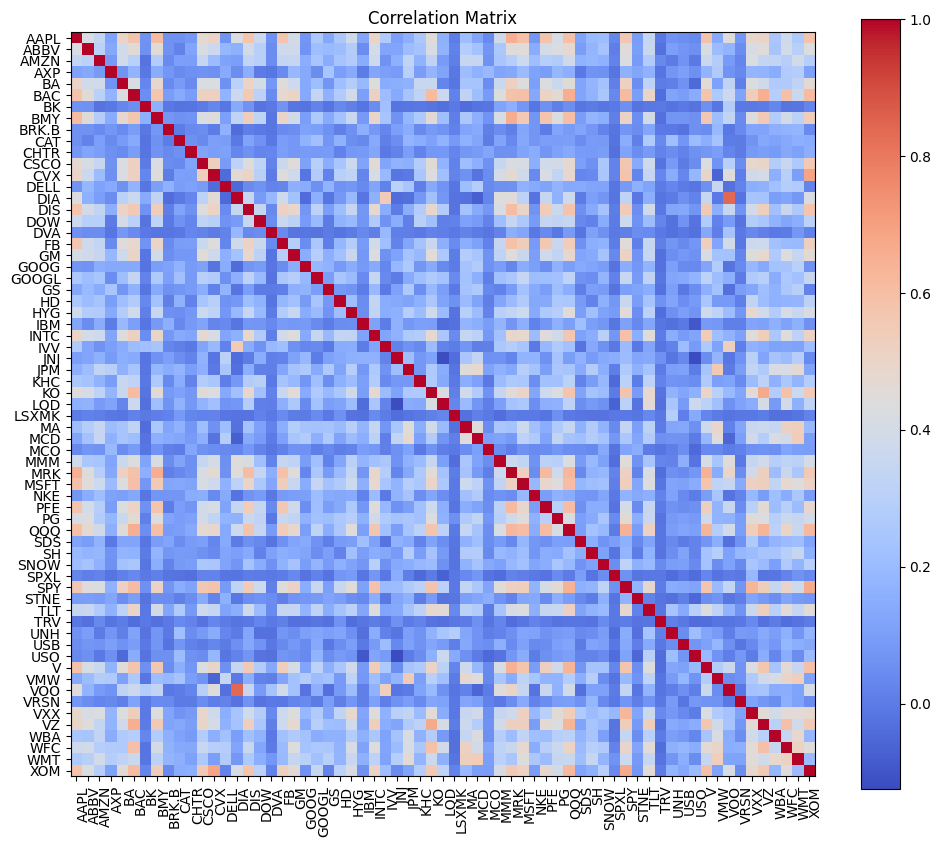

In [19]:
# Select relevant columns for book updates
numeric_columns_bookupdates = bookupdates[['COLLECTION_TIME', 'SYMBOL', 'BID_PRICE_1', 'BID_SIZE_1', 'BID_PRICE_2',
                                           'BID_SIZE_2', 'BID_PRICE_3', 'BID_SIZE_3', 'ASK_PRICE_1', 'ASK_SIZE_1',
                                           'ASK_PRICE_2', 'ASK_SIZE_2', 'ASK_PRICE_3', 'ASK_SIZE_3']].copy()

# Select relevant columns for trades
numeric_columns_trades = trades[['COLLECTION_TIME', 'SYMBOL', 'PRICE', 'SIZE']].copy()

# Convert 'COLLECTION_TIME' to datetime
numeric_columns_bookupdates['COLLECTION_TIME'] = pd.to_datetime(numeric_columns_bookupdates['COLLECTION_TIME'])
numeric_columns_trades['COLLECTION_TIME'] = pd.to_datetime(numeric_columns_trades['COLLECTION_TIME'])

# Aggregate book updates by minute and symbol
bookupdates_aggregated = numeric_columns_bookupdates.groupby(['SYMBOL', pd.Grouper(key='COLLECTION_TIME', freq='1Min')]).sum().reset_index()

# Aggregate trades by minute and symbol
trades_aggregated = numeric_columns_trades.groupby(['SYMBOL', pd.Grouper(key='COLLECTION_TIME', freq='1Min')]).sum().reset_index()

# Merge aggregated datasets
merged_data = pd.merge(bookupdates_aggregated, trades_aggregated, on=['SYMBOL', 'COLLECTION_TIME'], how='inner')

# Pivot the DataFrame to have symbols as columns
pivot_data = merged_data.pivot(index='COLLECTION_TIME', columns='SYMBOL')

# Fill NaN values with 0
pivot_data = pivot_data.fillna(0)

# Calculate correlation matrix
correlation_matrix = pivot_data.corr()
# print(correlation_matrix)

symbols = list(correlation_matrix.index.levels[1])
# Combine bid and ask prices, sizes, and trade prices in the correlation matrix
combined_correlation_matrix = pd.DataFrame(index=symbols, columns=symbols)

for symbol1 in symbols:
    for symbol2 in symbols:
        combined_correlation_matrix.loc[symbol1, symbol2] = (
            correlation_matrix.loc[('BID_PRICE_1', symbol1), ('BID_PRICE_1', symbol2)] +
            correlation_matrix.loc[('BID_PRICE_2', symbol1), ('BID_PRICE_2', symbol2)] +
            correlation_matrix.loc[('BID_PRICE_3', symbol1), ('BID_PRICE_3', symbol2)] +
            correlation_matrix.loc[('BID_SIZE_1', symbol1), ('BID_SIZE_1', symbol2)] +
            correlation_matrix.loc[('BID_SIZE_2', symbol1), ('BID_SIZE_2', symbol2)] +
            correlation_matrix.loc[('BID_SIZE_3', symbol1), ('BID_SIZE_3', symbol2)] +
            correlation_matrix.loc[('ASK_PRICE_1', symbol1), ('ASK_PRICE_1', symbol2)] +
            correlation_matrix.loc[('ASK_PRICE_2', symbol1), ('ASK_PRICE_2', symbol2)] +
            correlation_matrix.loc[('ASK_PRICE_3', symbol1), ('ASK_PRICE_3', symbol2)] +
            correlation_matrix.loc[('ASK_SIZE_1', symbol1), ('ASK_SIZE_1', symbol2)] +
            correlation_matrix.loc[('ASK_SIZE_2', symbol1), ('ASK_SIZE_2', symbol2)] +
            correlation_matrix.loc[('ASK_SIZE_3', symbol1), ('ASK_SIZE_3', symbol2)] +
            correlation_matrix.loc[('PRICE', symbol1), ('PRICE', symbol2)] +
            correlation_matrix.loc[('SIZE', symbol1), ('SIZE', symbol2)]
        ) / 14

# Fill NaN values with 0
combined_correlation_matrix = combined_correlation_matrix.fillna(0)

# Set the size of the plot
plt.figure(figsize=(12, 10))

# Create a heatmap
heatmap = plt.imshow(combined_correlation_matrix, cmap='coolwarm', interpolation='none')

# Display colorbar
plt.colorbar(heatmap)

# Set labels for x and y axes
plt.xticks(range(len(combined_correlation_matrix.columns)), combined_correlation_matrix.columns)
plt.yticks(range(len(combined_correlation_matrix.index)), combined_correlation_matrix.index)

# Rotate the tick labels and set their alignment
plt.setp(plt.gca().get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

## Q26. Plot sector correlation heatmap

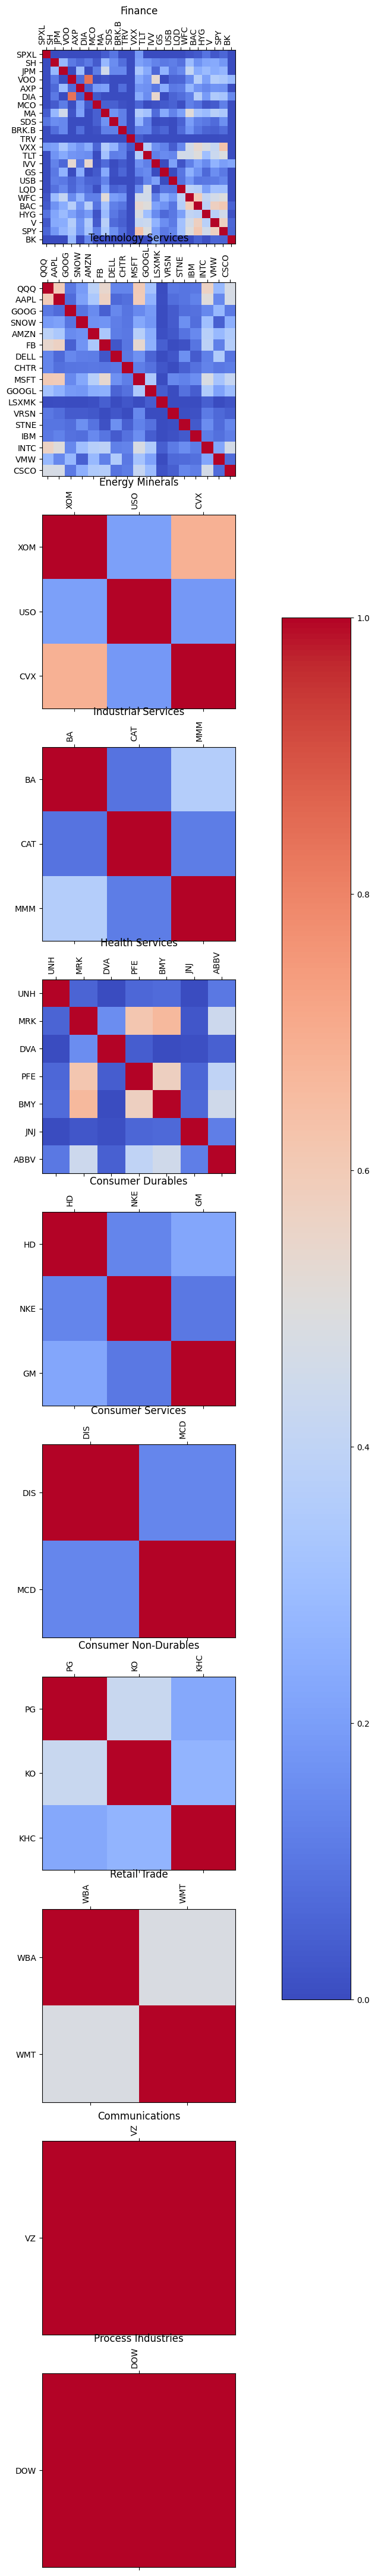

In [20]:
# Create a list of sectors
sectors = list(stocks_per_sector.keys())

# Create a list of sectors
sectors = list(stocks_per_sector.keys())

# Set up subplots with relative size
fig, axes = plt.subplots(nrows=len(sectors), figsize=(10, 5 * len(sectors)))
gs = gridspec.GridSpec(len(sectors), 5, height_ratios=[1] * len(sectors), hspace=0.9)


# Plot heatmaps for each sector
for i, (sector, stocks) in enumerate(stocks_per_sector.items()):
    # Filter out duplicate stocks
    unique_stocks = list(set(stocks))
    
    # Filter stocks that are present in the correlation matrix
    valid_stocks = [stock for stock in unique_stocks if stock in combined_correlation_matrix.index]
    sector_matrix = combined_correlation_matrix.loc[valid_stocks, valid_stocks]
    
    # Plot heatmap
    cax = axes[i].matshow(sector_matrix, cmap='coolwarm', vmin=0, vmax=1)
    axes[i].set_title(sector)
    
    # Set stock symbols as tick labels
    axes[i].set_xticks(range(len(valid_stocks)))
    axes[i].set_yticks(range(len(valid_stocks)))
    axes[i].set_xticklabels(valid_stocks, rotation=90, ha='right')
    axes[i].set_yticklabels(valid_stocks)

# Add a colorbar
fig.colorbar(cax, ax=axes, orientation='vertical', pad=0.1)

# plt.tight_layout()
plt.show()

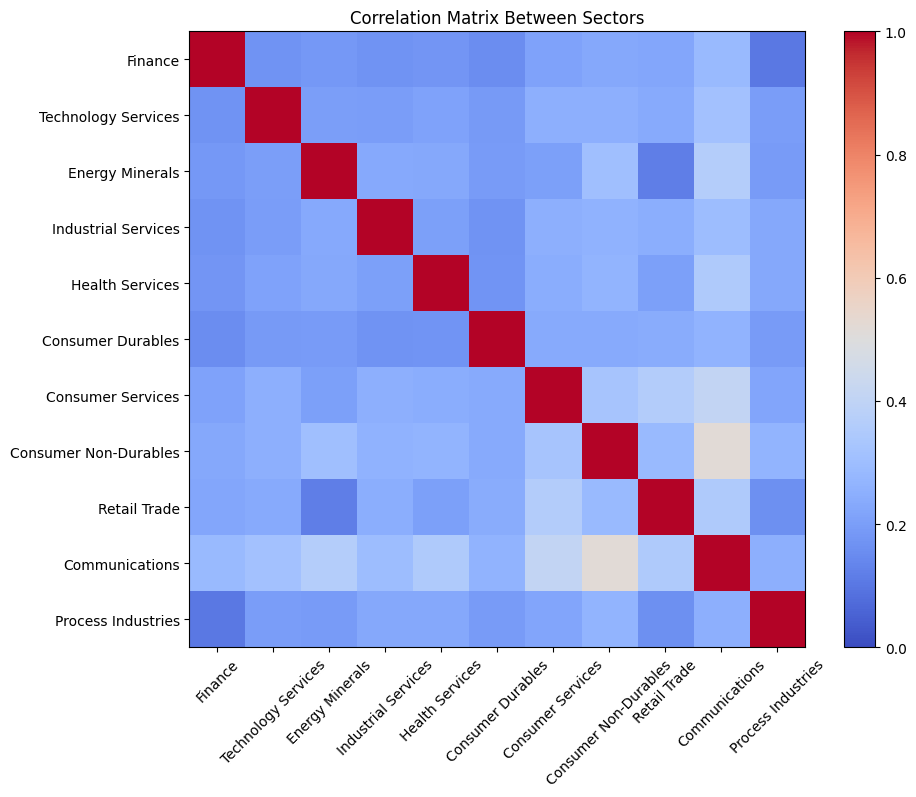

In [ ]:
# Filter stocks that are present in the correlation matrix
valid_stocks = set(stock for stocks in stocks_per_sector.values() for stock in stocks)
valid_stocks = [stock for stock in valid_stocks if stock in combined_correlation_matrix.index]

# Create a matrix for the correlation values between sectors
sector_correlation_matrix = np.zeros((len(sectors), len(sectors)))

# Calculate the correlation matrix
for i, sector1 in enumerate(sectors):
    for j, sector2 in enumerate(sectors):
        stocks1 = stocks_per_sector[sector1]
        stocks2 = stocks_per_sector[sector2]
        
        # Filter stocks that are present in the correlation matrix
        valid_stocks1 = [stock for stock in stocks1 if stock in valid_stocks]
        valid_stocks2 = [stock for stock in stocks2 if stock in valid_stocks]
        
        # Calculate average correlation between stocks in the two sectors
        correlation_values = combined_correlation_matrix.loc[valid_stocks1, valid_stocks2].values.flatten()
        average_correlation = correlation_values.mean()
        
        if i == j:
            average_correlation = 1  # Set diagonal elements to 1
        
        sector_correlation_matrix[i, j] = average_correlation

# Plot the correlation matrix between sectors
plt.figure(figsize=(10, 8))
plt.imshow(sector_correlation_matrix, cmap='coolwarm', vmin=0, vmax=1)
plt.colorbar()
plt.xticks(np.arange(len(sectors)), sectors, rotation=45)
plt.yticks(np.arange(len(sectors)), sectors)
plt.title('Correlation Matrix Between Sectors')
plt.show()

## Q27. What is spread?


Spread refers to the difference between the buying (bid) and selling (ask) prices of a security. This difference is known as the bid-ask spread.

1. **Bid-Ask Spread:**

   - **Bid Price:** The highest price a buyer is willing to pay for a security.
   - **Ask Price:** The lowest price a seller is willing to accept for the same security.
   - **Spread:** The difference between the bid and ask prices.

The bid-ask spread represents a cost for traders because they buy at the higher ask price and sell at the lower bid price. The spread is influenced by factors such as liquidity, market supply and demand, and the trading activity of a particular security. Highly liquid securities often have narrow spreads, while less liquid securities may have wider spreads.

For example, if the current quote for a stock is $50 (bid) - $51 (ask), the bid-ask spread is $1.

## Q28. Plot the spread for AAPL from 15:30PM to 16:00PM.

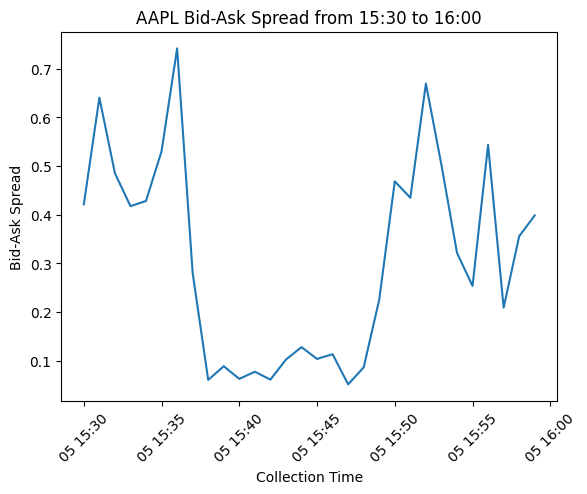

In [55]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    start_time = '15:30:00'
    end_time = '16:00:00'

    filtered_data = bookupdates[(bookupdates['SYMBOL'] == 'AAPL') & (bookupdates['COLLECTION_TIME'].dt.time >= pd.to_datetime(start_time).time()) & (bookupdates['COLLECTION_TIME'].dt.time <= pd.to_datetime(end_time).time())]
    filtered_data['HourMinute'] = filtered_data['COLLECTION_TIME'].dt.strftime('%H:%M')

    #Calculate bid-ask spread using .loc to avoid SettingWithCopyWarning
    filtered_data.loc[:, 'SPREAD'] = filtered_data['ASK_PRICE_1'] - filtered_data['BID_PRICE_1']


    resampled_data = filtered_data.groupby(['HourMinute']).resample('1T', on='COLLECTION_TIME').mean().reset_index()

    plt.plot(resampled_data['COLLECTION_TIME'], resampled_data['SPREAD'])
    plt.xlabel('Collection Time')
    plt.ylabel('Bid-Ask Spread')
    plt.title('AAPL Bid-Ask Spread from 15:30 to 16:00')
    plt.xticks(rotation=45)
    plt.show()


## Q29. Describe 2 scenarios where the spread tightens

The bid-ask spread in financial markets can tighten under various scenarios. Here are two scenarios where the spread might tighten:

1. **Increased Market Liquidity:**
   - **Scenario:** When there is an increase in market liquidity, meaning more participants are actively buying and selling a particular security.
   - **Explanation:** Market makers and other liquidity providers compete for order flow. As more buyers and sellers enter the market, there is a higher volume of trades. This increased activity can lead to a tighter bid-ask spread as market participants strive to capture trades and compete with each other, narrowing the difference between the highest bid and the lowest ask prices.

2. **Positive News or Earnings Announcement:**
   - **Scenario:** A company releases positive news, such as strong earnings results, a new product announcement, or a favorable regulatory development.
   - **Explanation:** Positive news often attracts more market participants, leading to increased trading activity. Investors may become more willing to buy or sell the stock, and market makers adjust their quotes to reflect the changing supply and demand dynamics. As the demand for a stock increases due to positive news, market makers may tighten the spread to encourage more trading and accommodate the higher level of interest. This results in a smaller difference between the bid and ask prices.


## Q30. What does it mean when you walk the spread?

"Walking the spread" is a term used in trading and finance to describe a deliberate and gradual adjustment of the bid and ask prices by a trader or market maker. This adjustment is often done to manage the spread.


## Q31. Plot the distributions of the spread for the 5 most liquid stocks.
(What do I mean by liquid?)

Here, I define liquidity to be extent to which a market allows assets to be bought and sold at stable, transparent prices. Thus, if the spread of a stock is less, it is more liquid since the bid and ask prices are closer and it is easier to trade the stock. 

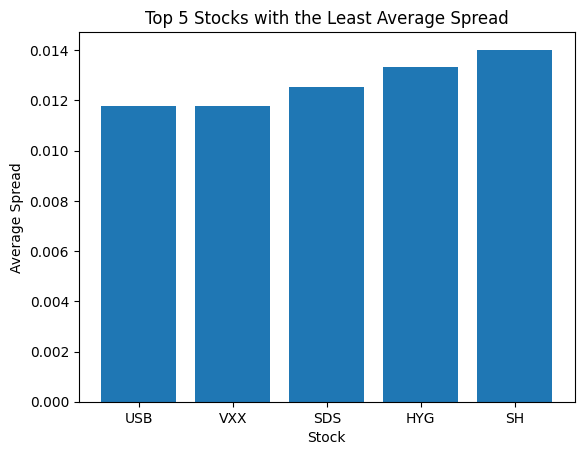

In [61]:
# Calculate spread for each row
bookupdates['SPREAD'] = bookupdates['ASK_PRICE_1'] - bookupdates['BID_PRICE_1']

# Group by 'SYMBOL' and calculate the average spread for each stock
average_spread_by_stock = bookupdates.groupby('SYMBOL')['SPREAD'].mean().reset_index()




sorted_stocks = average_spread_by_stock.sort_values(by='SPREAD', ascending=True)

# Select the top 5 stocks with the least average spread
top_5_stocks = sorted_stocks.head(5)

# Plot the stock names and their corresponding average spread
plt.bar(top_5_stocks['SYMBOL'], top_5_stocks['SPREAD'])
plt.xlabel('Stock')
plt.ylabel('Average Spread')
plt.title('Top 5 Stocks with the Least Average Spread')
plt.show()

## Q32. What do you observe?

It is interesting to note that all the stocks are certain kinds of ETFs (or ETNs - VXX) used to track the performance of S&P500.



## Q33. What is Order Flow Imbalance?

Order flow imbalance refers to a situation in financial markets where there is an uneven distribution of buy and sell orders. It occurs when there is a greater number or volume of buy orders (demand) compared to sell orders (supply), or vice versa. Order flow imbalance is a key concept in market microstructure analysis and is closely monitored by traders and analysts to gain insights into potential price movements.

## Q34. Find OFI for the same set of stocks

In [66]:
# Identify the set of stocks
stocks = ['USB', 'VXX', 'SDS', 'HYG', 'SH']

# Filter bookupdates for the selected stocks and relevant message types
filtered_bookupdates = bookupdates[(bookupdates['SYMBOL'].isin(stocks)) & ((bookupdates['MESSAGE_TYPE'] == 'ASK_UPDATE') | (bookupdates['MESSAGE_TYPE'] == 'BID_UPDATE'))]

# Group by SYMBOL, MESSAGE_TYPE, and COLLECTION_TIME to count bids, asks, and total volume
grouped_data = filtered_bookupdates.groupby(['SYMBOL', 'MESSAGE_TYPE', 'COLLECTION_TIME']).agg({'BID_SIZE_1': 'sum', 'ASK_SIZE_1': 'sum', 'BID_PRICE_1': 'count', 'ASK_PRICE_1': 'count'}).reset_index()

# Calculate the total volume for each update
grouped_data['TOTAL_VOLUME'] = grouped_data['BID_SIZE_1'] + grouped_data['ASK_SIZE_1']

# Calculate the Order Flow Imbalance (OFI) using the formula
grouped_data['OFI'] = (grouped_data['ASK_SIZE_1'] - grouped_data['BID_SIZE_1']) / grouped_data['TOTAL_VOLUME']

# Aggregate OFI over time for each stock
ofi_by_stock = grouped_data.groupby(['SYMBOL', 'COLLECTION_TIME'])['OFI'].sum().reset_index()

avg_ofi_by_stock = ofi_by_stock.groupby('SYMBOL')['OFI'].mean().reset_index()

avg_ofi_by_stock

SYMBOL       OFI
0    HYG -0.129801
1    SDS  0.106391
2     SH  0.098541
3    USB -0.082918
4    VXX -0.018362

## Q35. Plot the distributions of the OFI

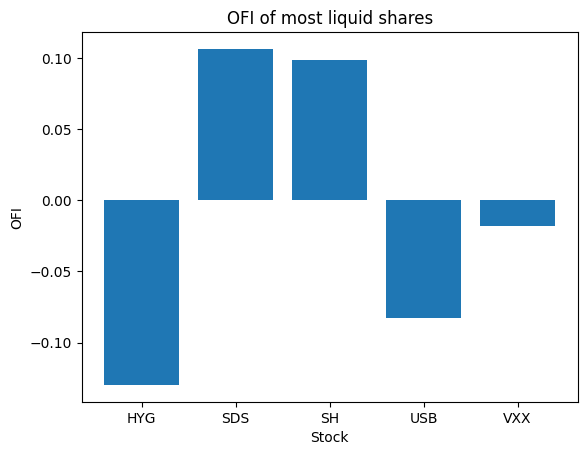

In [67]:
# Plot the stock names and their corresponding average spread
plt.bar(avg_ofi_by_stock['SYMBOL'], avg_ofi_by_stock['OFI'])
plt.xlabel('Stock')
plt.ylabel('OFI')
plt.title('OFI of most liquid shares')
plt.show()

## Q36. What do you observe?

A negative Order Flow Imbalance (OFI) indicates that there is more selling activity (market sell orders) compared to buying activity (market buy orders) during a specific period.

If the OFI is negative, it suggests a predominance of bearish sentiment during the observed time period

A positive Order Flow Imbalance (OFI) suggests that there is more buying activity (market buy orders) compared to selling activity (market sell orders) during a specific period. The OFI is a measure of the order flow direction and provides insights into the market dynamics.

If the OFI is positive, it indicates a predominance of bullish sentiment during the observed time period.

## Q37. What is arbitrage?

Arbitrage is a financial strategy that involves exploiting price differences for the same asset in different markets or trading venues to make a profit with little or no risk. Traders engaging in arbitrage, known as arbitrageurs, take advantage of discrepancies in prices, exchange rates, interest rates, or other related financial instruments.

## Q38. What is Index Arbitrage?

Index arbitrage is a trading strategy that seeks to profit from the price differences between a stock market index futures contract and the underlying stocks that make up the index. The strategy involves simultaneously buying or selling a basket of stocks that make up a particular index and offsetting the position with the sale or purchase of the corresponding index futures contract.

## Q39. Come up with 5 more statistical analysis and show your results.<br>Also explain why they are significant to your strategies


1. **Correlation Analysis:**
   - **Analysis:** Calculate the correlation coefficients between the returns of different assets in your portfolio.
   - **Significance:** Understanding the correlation between assets helps in building a diversified portfolio. Low or negative correlations between assets can potentially reduce overall portfolio risk.

2. **Volatility Clustering:**
   - **Analysis:** Examine the clustering of volatility by analyzing the standard deviation of asset returns over different time periods.
   - **Significance:** Volatility clustering suggests that periods of high volatility are often followed by more high-volatility periods and vice versa. This information can be crucial for risk management and position sizing.

3. **Autocorrelation Analysis:**
   - **Analysis:** Study the autocorrelation of asset returns over time.
   - **Significance:** Autocorrelation helps identify patterns or trends in historical price movements. It can be useful for predicting potential future price movements and timing entry or exit points.

4. **Cointegration Analysis:**
   - **Analysis:** Test for cointegration between pairs of assets.
   - **Significance:** Cointegration helps identify pairs of assets that move together in the long run. In pairs trading strategies, understanding cointegration can be essential for making trading decisions when the spread between two assets deviates from its historical average.

5. **Hurst Exponent Calculation:**
   - **Analysis:** Calculate the Hurst exponent for a time series to determine its long-term trend behavior.
   - **Significance:** The Hurst exponent helps identify whether a time series exhibits a trend, mean-reverting, or random-walk behavior. This information can be crucial for trend-following or mean-reversion strategies.

# Section 3
When we backtest our strategies, we will get 3 csv files as our results. Let's now get a feel of how it will be.<br>
(The results are for a sample strategy so don't try to make sense of the results. This exercise is to give you a feel of what analytics you could potentially do to improve your strategies)

In [ ]:
orders = pd.read_csv(f"BACK_InstanceName1_2023-08-01_023854_start_11-05-2021_end_11-05-2021_order.csv")
fill = pd.read_csv(f"BACK_InstanceName1_2023-08-01_023854_start_11-05-2021_end_11-05-2021_fill.csv")
pnl = pd.read_csv(f"BACK_InstanceName1_2023-08-01_023854_start_11-05-2021_end_11-05-2021_pnl.csv")

In [ ]:
print(F"Cols in Orders: {orders.columns}\n")
print(F"Cols in Fill: {fill.columns}\n")
print(F"Cols in PnL: {pnl.columns}")

Cols in Orders: Index(['StrategyName', 'EntryTime', 'LastModTime', 'State', 'LastUpdateType',
       'Symbol', 'Side', 'Type', 'TIF', 'Price', 'Quantity', 'DisplayQuantity',
       'FilledQty', 'Remains', 'AvgFillPrice', 'ExecutionCost', 'Account',
       'Trader', 'Broker', 'MarketCenter', 'OrderId', 'Tag', 'Reason',
       'Closure'],
      dtype='object')

Cols in Fill: Index(['StrategyName', 'TradeTime', 'Symbol', 'Quantity', 'Price',
       'ExecutionCost', 'LiquidityAction', 'LiquidityCode', 'RawLiquidity',
       'Account', 'Trader', 'MarketCenter', 'OrderID', 'ExecID',
       'TransactionType'],
      dtype='object')

Cols in PnL: Index(['Name', 'Time', 'Cumulative PnL'], dtype='object')


In [ ]:
orders.head()

StrategyName                    TradeTime Symbol  Quantity  Price  \
0  InstanceName1  2021-Nov-05 13:30:17.721021   AAPL        83  152.6   
1  InstanceName1  2021-Nov-05 13:30:17.786637   AAPL        17  152.6   
2  InstanceName1  2021-Nov-05 13:30:19.319984   AAPL        83  152.6   
3  InstanceName1  2021-Nov-05 13:30:19.332446   AAPL        17  152.6   
4  InstanceName1  2021-Nov-05 13:30:20.728622   AAPL        83  152.6   

   ExecutionCost LiquidityAction  LiquidityCode  RawLiquidity       Account  \
0         0.0996         REMOVED              0           NaN  SIM-1001-101   
1         0.0204           ADDED              0           NaN  SIM-1001-101   
2         0.0996         REMOVED              0           NaN  SIM-1001-101   
3         0.0204           ADDED              0           NaN  SIM-1001-101   
4         0.0996         REMOVED              0           NaN  SIM-1001-101   

       Trader MarketCenter          OrderID  ExecID TransactionType  
0  dlariviere          IEX  365527486693376     NaN            FILL  
1  dlariviere          IEX  365527486693376     NaN            FILL  
2  dlariviere          IEX  365527486693377     NaN            FILL  
3  dlariviere          IEX  365527486693377     NaN            FILL  
4  dlariviere          IEX  365527486693378     NaN            FILL

In [ ]:
fill.head()

In [ ]:
pnl.head()

Name                         Time  Cumulative PnL
0  InstanceName1  2021-Nov-05 13:30:15.275122        0.000000
1  InstanceName1  2021-Nov-05 13:31:15.505096    -6897.038656
2  InstanceName1  2021-Nov-05 13:32:16.380840    -6962.038656
3  InstanceName1  2021-Nov-05 13:33:16.555779    -7855.417613
4  InstanceName1  2021-Nov-05 13:34:16.760753    -8821.877683

## Q40. Describe each column for all 3 files in 1 line

In [ ]:
columns_df1 = orders.columns.tolist()
columns_df2 = fill.columns.tolist()
columns_df3 = pnl.columns.tolist()
columns = columns_df1 + columns_df2 + columns_df3
print(columns)

['StrategyName', 'EntryTime', 'LastModTime', 'State', 'LastUpdateType', 'Symbol', 'Side', 'Type', 'TIF', 'Price', 'Quantity', 'DisplayQuantity', 'FilledQty', 'Remains', 'AvgFillPrice', 'ExecutionCost', 'Account', 'Trader', 'Broker', 'MarketCenter', 'OrderId', 'Tag', 'Reason', 'Closure', 'StrategyName', 'TradeTime', 'Symbol', 'Quantity', 'Price', 'ExecutionCost', 'LiquidityAction', 'LiquidityCode', 'RawLiquidity', 'Account', 'Trader', 'MarketCenter', 'OrderID', 'ExecID', 'TransactionType', 'Name', 'Cumulative PnL']


orders.csv:<br>
Name:InstanceName1<br>
EntryTime: The timestamp when the order was initially created.<br>
LastModTime: The timestamp when the order was last modified. <br>
State:current status of the order. (filled)<br>
LastUpdateType:FILL<br>
Symbol:The ticker of the order.<br>
Side:Buy or SELL<br>
Type:DAY<br>
<br>TIF:Time in Force, how long the order will remain active before it expires.<br>
Price: The price of the order.<br>
Quantity: Quantity of the order.<br>
DisplayQuantity:The quantity of the order that is visible to the market (for iceberg orders).<br>
FilledQty:The quantity of order that has been filled.<br>
Remains: Not filled left.<br>
AvgFillPrice: Average filled price<br>
ExecutionCost:transcation cost of the order<br>
Account:SIM-1001-101<br>
Trader: ,dlariviere<br>
Broker:FILL_SIMULATOR<br>
MarketCenter:The exchange where the order is executed, here it's IEX<br>
Tag,Reason,Closure: NaN<br>

fill.csv:<br>
StrategyName:InstanceName1<br>
TradeTime: The timestamp when the order was traded.<br>
LiquidityAction: IWhether the trade added or removed liquidity from the market.<br>
RawLiquidity: 0<br>

pnl.csv:<br>
Name:InstanceName1<br>
Time:Approximately calculate the pnl for every 1 minutes<br>
Cumulative PnL: pnl

## Q41. What was our total transaction cost?

In [ ]:
f'The total transaction cost is {orders["ExecutionCost"].sum() + fill["ExecutionCost"].sum()}.'

'The total transaction cost is 3228.420341.'

## Q42. What is the average buying price and selling price?

In [ ]:
buy_prices = [price for side, price in zip(orders['Side'], orders['Price']) if side == 'BUY']
average_buy_price = sum(buy_prices) / len(buy_prices)
sell_prices = [price for side, price in zip(orders['Side'], orders['Price']) if side == 'SELL']
average_sell_price = sum(sell_prices) / len(sell_prices)

f'The average buying price is {average_buy_price}, the average selling price is {average_sell_price}.'

'The average buying price is 151.20927219321067, the average selling price is 150.78588839941332.'

## Q43. Plot the cumulative PnL

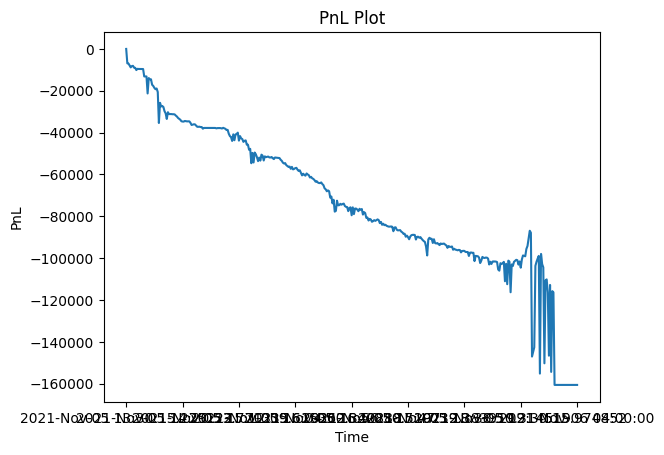

In [ ]:
pnl['Cumulative PnL'].plot()
plt.title('PnL Plot')
plt.xlabel('Time')
plt.ylabel('PnL')
plt.show()

## Q44. Come up with few more ways you would measure/track your performance from these statistics

Sharpe Ratio: The Sharpe Ratio is a measure used to evaluate the performance of a strategy compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.

Maximum Drawdown: Maximum Drawdown is a measure of an investment's largest single drop from peak to trough in value before a new peak is achieved. It is often used as an indicator of downside risk over a specified time period.